# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random as random


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

api_key = weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key 
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
json = []

url = []
for x in cities:
    
    requests.get(query_url + x)
    response = requests.get(query_url + x).json()
    json.append(response)
    url.append(query_url + x)
    print(f'Requesting Json for {x}')
    print(requests.get(query_url + x))
    
print(len(json))  
    


Requesting Json for castro
<Response [200]>
Requesting Json for sao jose da coroa grande
<Response [200]>
Requesting Json for bluff
<Response [200]>
Requesting Json for flagstaff
<Response [200]>
Requesting Json for otradnoye
<Response [200]>
Requesting Json for safakulevo
<Response [200]>
Requesting Json for esperance
<Response [200]>
Requesting Json for alakurtti
<Response [200]>
Requesting Json for albany
<Response [200]>
Requesting Json for tezu
<Response [200]>
Requesting Json for bredasdorp
<Response [200]>
Requesting Json for hobart
<Response [200]>
Requesting Json for provideniya
<Response [200]>
Requesting Json for qaanaaq
<Response [200]>
Requesting Json for ust-nera
<Response [200]>
Requesting Json for rikitea
<Response [200]>
Requesting Json for qaqortoq
<Response [200]>
Requesting Json for kaitangata
<Response [200]>
Requesting Json for ushuaia
<Response [200]>
Requesting Json for viedma
<Response [200]>
Requesting Json for nishihara
<Response [200]>
Requesting Json for ta

Requesting Json for dikson
<Response [200]>
Requesting Json for ibb
<Response [200]>
Requesting Json for mahajanga
<Response [200]>
Requesting Json for farafangana
<Response [200]>
Requesting Json for bambanglipuro
<Response [200]>
Requesting Json for kahului
<Response [200]>
Requesting Json for san rafael
<Response [200]>
Requesting Json for nicoya
<Response [200]>
Requesting Json for miraflores
<Response [200]>
Requesting Json for chokurdakh
<Response [200]>
Requesting Json for pisco
<Response [200]>
Requesting Json for praia da vitoria
<Response [200]>
Requesting Json for torbay
<Response [200]>
Requesting Json for jamestown
<Response [200]>
Requesting Json for ambodifototra
<Response [404]>
Requesting Json for kirakira
<Response [200]>
Requesting Json for grand gaube
<Response [200]>
Requesting Json for lompoc
<Response [200]>
Requesting Json for buchanan
<Response [200]>
Requesting Json for plettenberg bay
<Response [200]>
Requesting Json for eureka
<Response [200]>
Requesting Jso

Requesting Json for utiroa
<Response [404]>
Requesting Json for escanaba
<Response [200]>
Requesting Json for wad rawah
<Response [200]>
Requesting Json for tumannyy
<Response [404]>
Requesting Json for napasar
<Response [200]>
Requesting Json for manbij
<Response [200]>
Requesting Json for mastic beach
<Response [200]>
Requesting Json for camana
<Response [200]>
Requesting Json for bubaque
<Response [200]>
Requesting Json for atherton
<Response [200]>
Requesting Json for acapulco
<Response [200]>
Requesting Json for ribeira grande
<Response [200]>
Requesting Json for pitsunda
<Response [200]>
Requesting Json for dunedin
<Response [200]>
Requesting Json for portland
<Response [200]>
Requesting Json for snezhnogorsk
<Response [200]>
Requesting Json for assiniboia
<Response [200]>
Requesting Json for khani
<Response [200]>
Requesting Json for gari
<Response [200]>
Requesting Json for rio cuarto
<Response [200]>
Requesting Json for kudahuvadhoo
<Response [200]>
Requesting Json for high le

Requesting Json for erken-shakhar
<Response [404]>
Requesting Json for rovaniemi
<Response [200]>
Requesting Json for lafiagi
<Response [200]>
Requesting Json for harper
<Response [200]>
Requesting Json for cavalcante
<Response [200]>
Requesting Json for darnah
<Response [200]>
Requesting Json for perpignan
<Response [200]>
Requesting Json for kushmurun
<Response [200]>
Requesting Json for itupiranga
<Response [200]>
Requesting Json for shangzhi
<Response [200]>
Requesting Json for port said
<Response [200]>
Requesting Json for malwan
<Response [404]>
Requesting Json for redwater
<Response [200]>
Requesting Json for saint-pierre
<Response [200]>
Requesting Json for nanpara
<Response [200]>
Requesting Json for freeport
<Response [200]>
Requesting Json for mount isa
<Response [200]>
Requesting Json for mpika
<Response [200]>
Requesting Json for fergus falls
<Response [200]>
Requesting Json for port hawkesbury
<Response [200]>
Requesting Json for murgab
<Response [200]>
Requesting Json fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data = {}
city_data["City"] = []
city_data["Cloudiness"] = []
city_data["Country"] = []
city_data["Date"] = []
city_data["Humidity"] = []
city_data["Lat"] = []
city_data["Lng"] = []
city_data["Max Temp"] = []
city_data["Wind Speed"] = []



#     try:
#         clouds.append(response['clouds']['all'])
#         clouds.append(response['sys']['AU'])
#     except KeyError:
#         clouds.append(0)



# city_data=pd.DataFrame(city_data)
# city_data.head()

# city_data

for x in range(len(json)):
    try:
        city_data["City"].append(json[x]['name'])
    except KeyError:
            city_data["City"].append(cities[x] + ' - ' + json[x]['message'])
    try:
        city_data["Cloudiness"].append(json[x]['clouds']['all'])
    except KeyError:
            city_data["Cloudiness"].append(0)            
    try:
        city_data["Country"].append(json[x]['sys']['country'])
    except KeyError:
            city_data["Country"].append(json[x]['message'])
    try:
        city_data["Date"].append(json[x]['dt'])
    except KeyError:
           city_data["Date"].append(0)
    try:
        city_data["Humidity"].append(json[x]['main']['humidity'])
    except KeyError:
           city_data["Humidity"].append(0)       
    try:
        city_data["Lat"].append(json[x]['coord']['lat'])
    except KeyError:
           city_data["Lat"].append(0)
    try:
        city_data["Lng"].append(json[x]['coord']['lon'])
    except KeyError:
           city_data["Lng"].append(0)
    try:
        city_data["Max Temp"].append(json[x]['main']['temp'])
    except KeyError:
           city_data["Max Temp"].append(0)
    try: 
        city_data["Wind Speed"].append(json[x]['wind']['speed'])
    except KeyError:
           city_data["Wind Speed"].append(0)                        
                    
            

city_data = pd.DataFrame(city_data)


city_fail = city_data[city_data['Country'] == "city not found"]

city_data = city_data[city_data['Country'] != "city not found"]
 
if len(city_data) > 500:
    print(f'Proceed: {len(city_data)} cities retrieved')
else: 
    print(f'Re-request Jsons: {len(city_data)} cities retrieved. {len(city_fail)} requests failed.')


Proceed: 561 cities retrieved


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

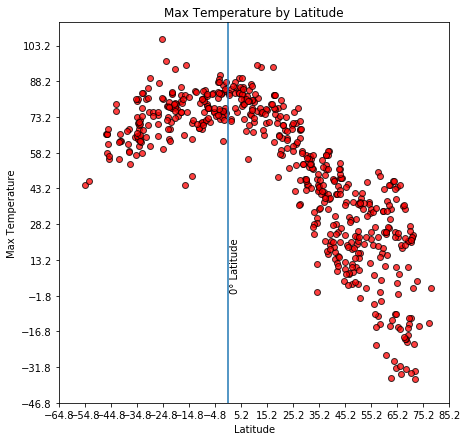

561

In [39]:
lat_total = city_data['Lat'].to_list()

temp_total = city_data['Max Temp'].tolist()

plt.scatter(lat_total,temp_total, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)

plt.title("Max Temperature by Latitude")

plt.xlabel("Latitude")

plt.ylabel("Max Temperature")

plt.xticks(np.arange(min(lat_total)-10, max(lat_total)+10, step=10))

plt.yticks(np.arange(min(temp_total)-10, max(temp_total)+10, step=15))

plt.axvline(x = 0)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.text(0.8,0,'0° Latitude',rotation=90)

plt.show()


In [6]:
#The line of best fit in the above scatter plot shows strong negative correlation between locations with latitudes that are nearer to 0 and higher temperatures. 
#The correlation skews sharply to very low tempatures as locations with positive latitudes increase further from zero.
#Outliers in the correlation occur in latitudes ranging from -45 and -24 degrees, where the temperatures seem to show a positive correlation between lower latitudes and lower temperatures.


#### Latitude vs. Humidity Plot

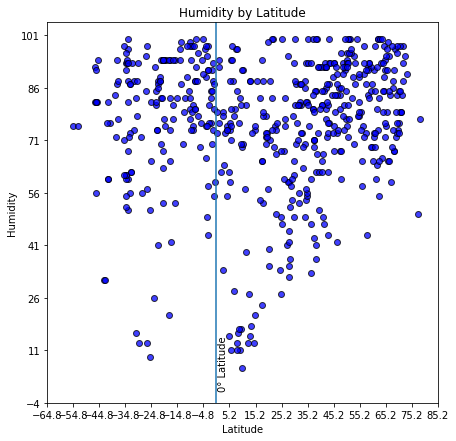

In [17]:
lat_total = city_data['Lat'].to_list()

humid_total = city_data['Humidity'].tolist()

plt.scatter(lat_total,humid_total, marker="o", facecolors="blue", edgecolors="black",
           alpha=0.75)

plt.title("Humidity by Latitude")

plt.xlabel("Latitude")

plt.ylabel("Humidity")

plt.xticks(np.arange(min(lat_total)-10, max(lat_total)+10, step=10))

plt.yticks(np.arange(min(humid_total)-10, max(humid_total)+10, step=15))

plt.axvline(x = 0)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.text(0.8,0,'0° Latitude',rotation=90)

plt.show()

In [8]:
#The above scatter plot shows virtually no correlation between humidity and latitude. 
#There are outliers in the scatterplot across the range of latitudes, for both positive and negative latitudes.
#There is a cluster of possible correlation between latitudes ranging from 60 to 75 degress may imply the beginning of a line of best fit; 
#however, with the very small sample size and lack of longitude as a cross reference, it is difficult to determine whether this possible correlation occurs
#only by latitude, or if it is more depedant on another factor than latitude (for instance sea level, relative distance from a body of water).

#### Latitude vs. Cloudiness Plot

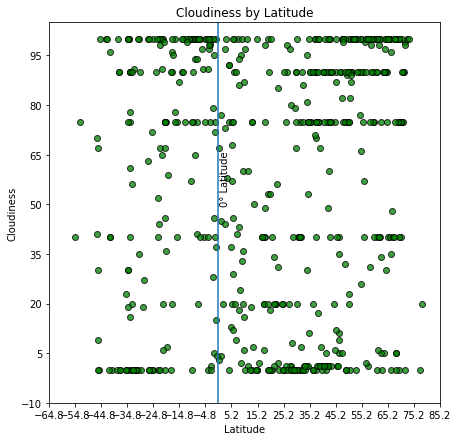

In [42]:
lat_total = city_data['Lat'].to_list()

cloud_total = city_data['Cloudiness'].tolist()

plt.scatter(lat_total,cloud_total, marker="o", facecolors="green", edgecolors="black",
           alpha=0.75)

plt.title("Cloudiness by Latitude")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness")

plt.xticks(np.arange(min(lat_total)-10, max(lat_total)+10, step=10))

plt.yticks(np.arange(min(cloud_total)-10, max(cloud_total)+10, step=15))

plt.axvline(x = 0)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.text(0.8,50,'0° Latitude',rotation=90)

plt.show()

In [10]:
#The above scatter plot shows no correlation bewtween latitude and cloudiness.
#There are multiple data points throughout all latitude ranges, which prevent the drawing of an ascending or descending line
#of best fit. The scatter plot seems to imply the need for an additional axis as reference (i.e. longitude), as patterns do seem
#to be forming, but not in a manner that suggests a consistent linear slope between the x and y axes. 

#### Latitude vs. Wind Speed Plot

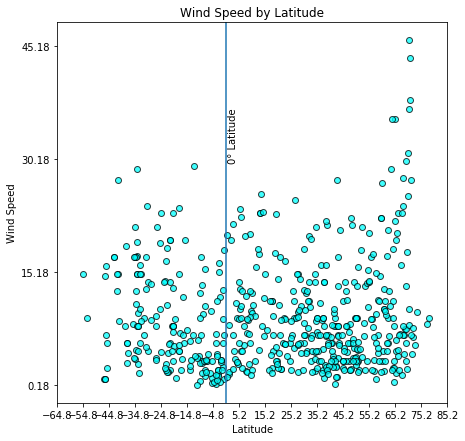

In [41]:
lat_total = city_data['Lat'].to_list()

wind_total = city_data['Wind Speed'].tolist()

plt.scatter(lat_total,wind_total, marker="o", facecolors="aqua", edgecolors="black",
           alpha=0.75)

plt.title("Wind Speed by Latitude")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed")

plt.xticks(np.arange(min(lat_total)-10, max(lat_total)+10, step=10))

plt.yticks(np.arange(min(wind_total), max(wind_total)+10, step=15))

plt.axvline(x = 0)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.text(0.8,30,'0° Latitude',rotation=90)

plt.show()


In [12]:
#The above scatter plot shows a very weak possible correlation between windspeed and latitude. 
#The scatter plot is better interpreted as no correlation between latitude and wind speed.
#A line of best fit may possibly be drawn which may show the hint of a correlation between higher wind speeds and more positive latitudes.
#The plot would again benefit from a larger sample size. 

## Linear Regression

X-Coordinates for calculating the regression equation are [-54.8, -16.48, 9.91, 13.47, 53.43, 78.22].
Y-Coordinates for calculating the regression equation are [105.8, 67.93, 30.83, 24.8, -31.4, -36.81].
Sum of X-Coordinates are 83.75.
Sum of Y-Coordinates are 161.15.
The sum of the product of each (x,y) pair is -10834.7253.
The sum of each x-coordinate squared is 12527.412699999999.
The sum of each x-coordinate squared is 19714.5899.
-1.151932322019052 is the slope of the line.
42.93738866151593 is the y-intercept of the line.
X-coordinates to be plotted are: [-54.8, -16.48, 9.91, 13.47, 53.43, 78.22].
Y_coord coordindates to be plotted are :[105.8, 61.92123332838991, 31.521739350307126, 27.4208602839193, -18.610355303962017, -36.81].


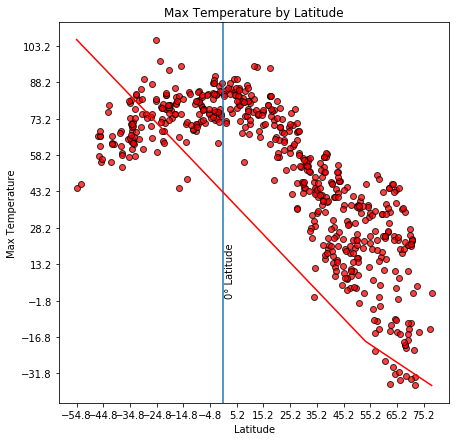

In [38]:
# OPTIONAL: Create a function to create Linear Regression plots

#find mean of x-values, independant variable 
x_mean = float(pd.DataFrame(lat_total).mean())

#create empty lists for random values from x-array,& create variables for min and max values. 

x_min = min(lat_total)
x_lowest = [] 
x_low = [] 
x_high = [] 
x_highest = []
x_max = max(lat_total)

#find mean of x-values, dependant variable
y_mean = float(pd.DataFrame(temp_total).mean())

#create empty lists for random values from y-array, & create variables for min and max values. 

y_min = min(temp_total)
y_lowest = [] 
y_low = [] 
y_high = [] 
y_highest= [] 
y_max = max(temp_total)

#divide x-variables into 4 segments:
for x in lat_total:
    if x <= x_mean *.25:
        x_lowest.append(x)
    elif x <= x_mean *.5:
        x_low.append(x)
    elif x <= x_mean*.75:
        x_high.append(x)
    else:
        x_highest.append(x)   

#divide y-variables into 4 segments:        
for x in temp_total:
    if x <= y_mean *.25:
        y_lowest.append(x)
    elif x <= y_mean *.5:
        y_low.append(x)
    elif x <= y_mean*.75:
        y_high.append(x)
    else:
        y_highest.append(x)         

#choose 4 random values from segmented x & Y lists, with min and max values from x & y lists at the ends of the list

x_coord = [x_min,random.choice(x_lowest),random.choice(x_low),random.choice(x_high),random.choice(x_highest),x_max]

y_coord = [y_max,random.choice(y_highest),random.choice(y_high),random.choice(y_low),random.choice(y_lowest),y_min]

print(f'X-Coordinates for calculating the regression equation are {x_coord}.')

print(f'Y-Coordinates for calculating the regression equation are {y_coord}.')

#calculate sum of x_coords
sum_x = sum(x_coord)

#calculate sum of y_coords
sum_y = sum(y_coord)

print(f'Sum of X-Coordinates are {sum_x}.')
print(f'Sum of Y-Coordinates are {sum_y}.')

#create list with length of 4 to house xy_sum calculations
xy_sum = [0,1,2,3,4,5]

#for loop to create a list of the product of each data set i.e. (x_coord[0],y_coord[0]) = xy_sum[0]
for x in range(len(x_coord)):
     xy_sum[x] = x_coord[x]*y_coord[x]
          
        
#sum the xy_product list    
xy_sum = sum(xy_sum)

print(f'The sum of the product of each (x,y) pair is {xy_sum}.')

#create empty list to house the square calculations of each coordinate
x_ponent = [0,1,2,3,4,5]

y_ponent = [0,1,2,3,4,5]

#calculate square of each x and y value and create a list of the products
for x in range(len(x_coord)):
    x_ponent[x] = x_coord[x]*x_coord[x]

for x in range(len(y_coord)):
    y_ponent[x] = y_coord[x]*y_coord[x]
    
#sum the products of the x & y squared lists    
x_ponent = sum(x_ponent)    

y_ponent = sum(y_ponent)
    
print(f'The sum of each x-coordinate squared is {x_ponent}.')

print(f'The sum of each x-coordinate squared is {y_ponent}.')

#N = number of data sets, 6
N = 6

#calculate slope of data set
m = ((N * xy_sum) - (sum_x * sum_y)) / ((N * x_ponent) - (sum_x * sum_x))

#calculate y intercept of data set
c = ((x_ponent * sum_y ) - (sum_x * xy_sum)) / ((N * x_ponent) - (sum_x * sum_x))

print(f'{m} is the slope of the line.')

print(f'{c} is the y-intercept of the line.')

#equation of a line is y = mx+c. Calculate y coordinates by multiplying x_coords by slope plus y-intercept.

y_min2 = m*x_min + c

y_lowest = m*x_coord[1] + c

y_low = m*x_coord[2] + c

y_high = m*x_coord[3] + c

y_highest = m*x_coord[4] + c

y_max2 = m*x_max + c

#create lists for the 6 points to plot

y_coord2 = [y_max,y_lowest,y_low,y_high,y_highest,y_min]

x_coord = [x_coord[0],x_coord[1],x_coord[2],x_coord[3],x_coord[4],x_coord[5]]

#create scatter plot
print(f'X-coordinates to be plotted are: {x_coord}.')
print(f'Y_coord coordindates to be plotted are :{y_coord2}.')

lat_total = city_data['Lat'].to_list()

temp_total = city_data['Max Temp'].tolist()

plt.scatter(lat_total,temp_total, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)

plt.title("Max Temperature by Latitude")

plt.xlabel("Latitude")

plt.ylabel("Max Temperature")

plt.xticks(np.arange(min(lat_total)-10, max(lat_total)+10, step=10))

plt.yticks(np.arange(min(temp_total)-10, max(temp_total)+10, step=15))

plt.axvline(x = 0)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.text(0.8,0,'0° Latitude',rotation=90)

#plot x & y coordinates

plt.plot(x_coord,y_coord2,'-r')

plt.show()



In [33]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression